# Import Liberaries

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ranadeep/credit-risk-dataset")

print("Path to dataset files:", path)

100%|██████████| 101M/101M [00:01<00:00, 100MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ranadeep/credit-risk-dataset/versions/3


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.tools as tls
import plotly.offline as py


import warnings

warnings.filterwarnings("ignore")

# Read Data

In [ ]:
df = pd.read_csv('/content/loan.csv')

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
null_percentages = df.isnull().mean() * 100



for column, percentage in null_percentages.items():

  if percentage:

    print({column: [round(percentage, 5), df[column].dtype]})

{'emp_title': [6.42841, dtype('O')]}
{'emp_length': [3.46269, dtype('O')]}
{'annual_inc': [0.00536, dtype('float64')]}
{'desc': [48.18427, dtype('O')]}
{'title': [0.01875, dtype('O')]}
{'delinq_2yrs': [0.03885, dtype('float64')]}
{'earliest_cr_line': [0.03885, dtype('O')]}
{'inq_last_6mths': [0.03885, dtype('float64')]}
{'mths_since_last_delinq': [59.00902, dtype('float64')]}
{'mths_since_last_record': [89.6106, dtype('float64')]}
{'open_acc': [0.03885, dtype('float64')]}
{'pub_rec': [0.03885, dtype('float64')]}
{'revol_util': [0.13931, dtype('float64')]}
{'total_acc': [0.03885, dtype('float64')]}
{'total_rec_prncp': [0.00134, dtype('float64')]}
{'total_rec_int': [0.00134, dtype('float64')]}
{'total_rec_late_fee': [0.00134, dtype('float64')]}
{'recoveries': [0.00134, dtype('float64')]}
{'collection_recovery_fee': [0.00134, dtype('float64')]}
{'last_pymnt_d': [0.12993, dtype('O')]}
{'last_pymnt_amnt': [0.00134, dtype('float64')]}
{'next_pymnt_d': [69.8927, dtype('O')]}
{'last_credit_pul

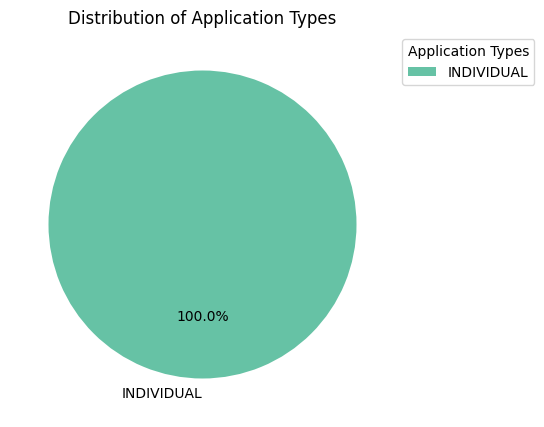

In [ ]:
# Get the value counts for 'application_type'
application_type_counts = df['application_type'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 5))

# Create the pie chart
plt.pie(application_type_counts.values, labels=application_type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2'))

# Add a legend
plt.legend(application_type_counts.index, title="Application Types", bbox_to_anchor=(1, 1), loc="best")

# Set title
plt.title('Distribution of Application Types')

# Display the plot
plt.show()

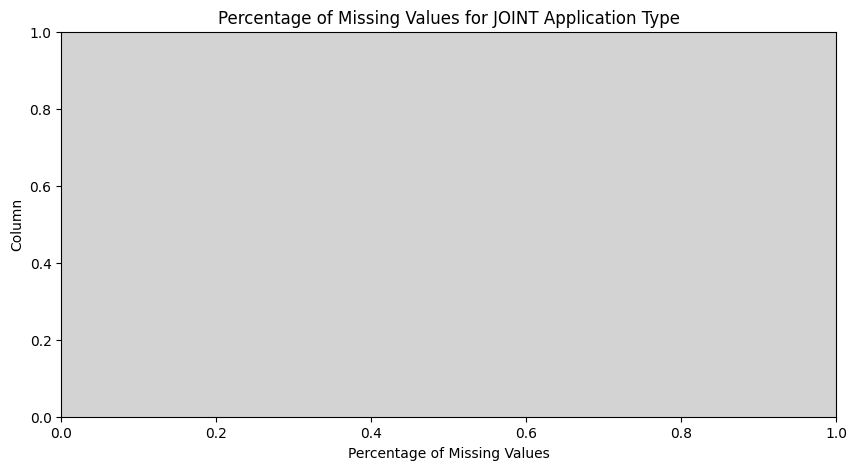

In [ ]:
# Get the percentage of missing values for the 'JOINT' application type
joint_na_percentages = df[df['application_type'] == 'JOINT'].isna().mean() * 100

# Filter columns with more than 5% missing values
joint_na_percentages = joint_na_percentages[joint_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 5))

# Create the bar plot using Seaborn
sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for JOINT Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

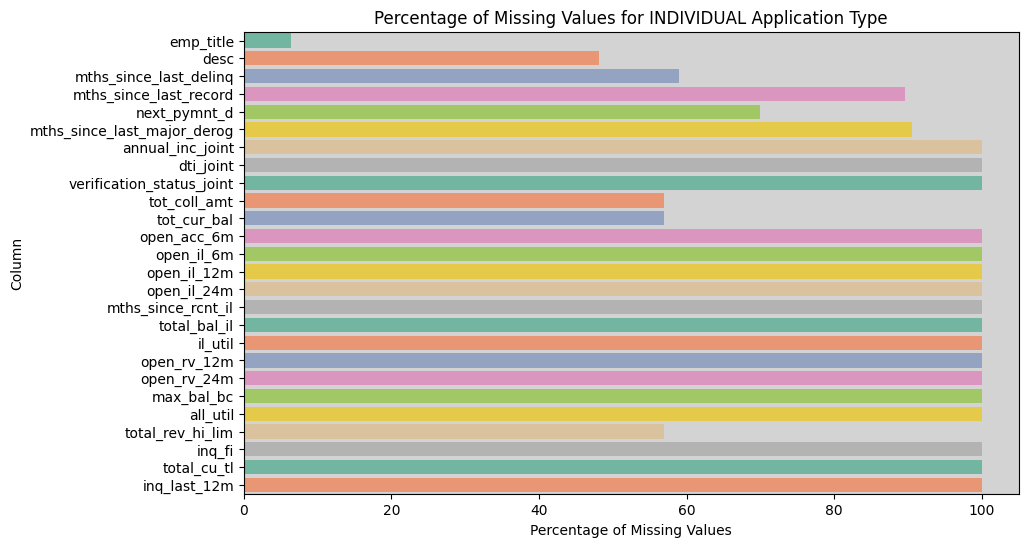

In [ ]:
# Get the percentage of missing values for the 'INDIVIDUAL' application type
individual_na_percentages = df[df['application_type'] == 'INDIVIDUAL'].isna().mean() * 100

# Filter columns with more than 5% missing values
individual_na_percentages = individual_na_percentages[individual_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for INDIVIDUAL Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [ ]:
df.shape

(74653, 74)

drop JOINT records to keep all values for INDIVIDUAL application_type

In [ ]:
df = df[df['application_type'] != 'JOINT']

In [ ]:
df.shape

(74653, 74)

In [ ]:
columns_to_drop = [i for i in df.columns if 'joint' in i]

columns_to_drop.append('application_type')

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

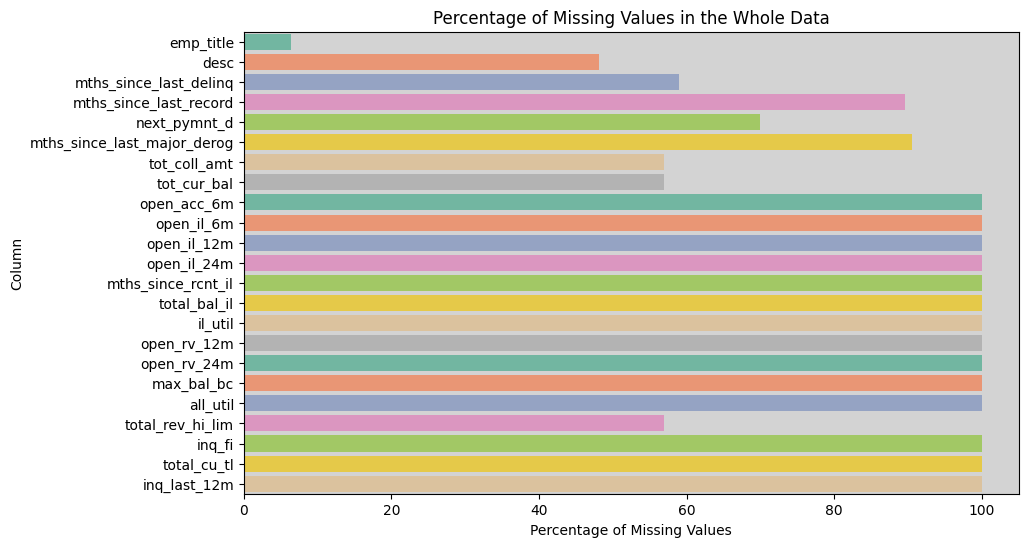

In [ ]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with more than 5% missing values
na_percentages = na_percentages[na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values in the Whole Data')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [ ]:
columns_to_drop = []

for i in df.columns:

  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
for i in df.columns:

  print({i: df[i].nunique()})

{'id': 74653}
{'member_id': 74653}
{'loan_amnt': 1046}
{'funded_amnt': 1133}
{'funded_amnt_inv': 9357}
{'term': 2}
{'int_rate': 430}
{'installment': 22986}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 45545}
{'emp_length': 11}
{'home_ownership': 5}
{'annual_inc': 7972}
{'verification_status': 3}
{'issue_d': 58}
{'loan_status': 9}
{'pymnt_plan': 2}
{'url': 74653}
{'purpose': 14}
{'title': 28550}
{'zip_code': 855}
{'addr_state': 50}
{'dti': 3472}
{'delinq_2yrs': 17}
{'earliest_cr_line': 575}
{'inq_last_6mths': 28}
{'open_acc': 47}
{'pub_rec': 12}
{'revol_bal': 31176}
{'revol_util': 1146}
{'total_acc': 85}
{'initial_list_status': 2}
{'out_prncp': 17397}
{'out_prncp_inv': 17533}
{'total_pymnt': 71573}
{'total_pymnt_inv': 71094}
{'total_rec_prncp': 28457}
{'total_rec_int': 66695}
{'total_rec_late_fee': 2547}
{'recoveries': 5883}
{'collection_recovery_fee': 4212}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 53310}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 4}
{'policy_code': 1}
{

In [ ]:
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})

{'term': term
36 months    55255
60 months    19398
Name: count, dtype: int64}
{'grade': grade
B    22375
C    17288
A    15545
D    11073
E     5558
F     2118
G      696
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    36155
RENT        32154
OWN          6200
OTHER         136
NONE            8
Name: count, dtype: int64}
{'verification_status': verification_status
Verified           27183
Not Verified       26565
Source Verified    20905
Name: count, dtype: int64}
{'loan_status': loan_status
Fully Paid                                             43747
Current                                                18758
Charged Off                                             8429
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                       564
In Grace Period                                          247
Late (16-30 days)                                

In [ ]:
df.drop(columns=['pymnt_plan', 'policy_code', 'acc_now_delinq'], inplace=True)

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0


In [ ]:
df[['grade', 'sub_grade']].head(5)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [ ]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
sub_grades = df['sub_grade'].unique()

sub_grades.sort()

sub_grades

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df.drop(columns=['id', 'member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d'], inplace=True)

In [ ]:
df.shape

(74653, 38)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,0.0


In [ ]:
df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)

In [ ]:
df.shape

(74653, 33)

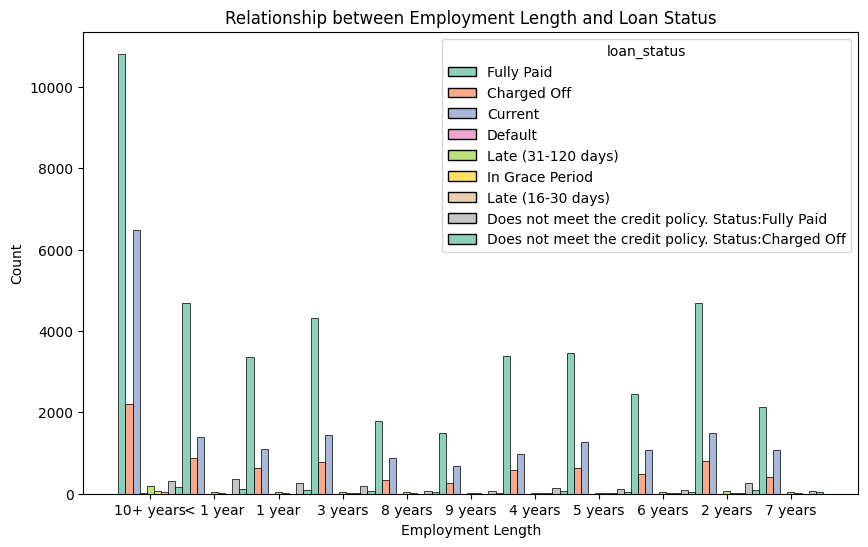

In [ ]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=df, x="emp_length", hue="loan_status", multiple="dodge", palette='Set2')

# Add title and axis labels
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
df.drop(columns=['emp_length'], inplace=True)

In [ ]:
importante_features = df.columns

In [ ]:
len(importante_features)

32

In [ ]:
terms = pd.read_excel('LCDataDictionary.xlsx')

In [ ]:
terms.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [ ]:
feature_description = terms[terms['LoanStatNew'].isin(importante_features)][['LoanStatNew', 'Description']]

In [ ]:
feature_description.reset_index(drop=True, inplace=True)

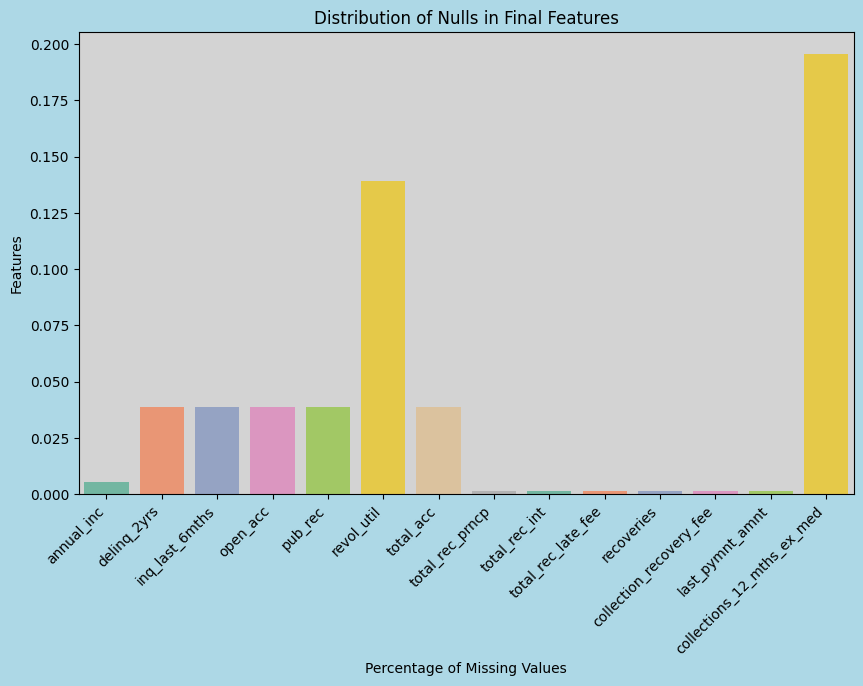

In [ ]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with any missing values
na_percentages = na_percentages[na_percentages > 0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Distribution of Nulls in Final Features')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Customize background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot
plt.gcf().set_facecolor('lightblue')  # Figure background color

# Display the plot
plt.show()

In [ ]:
df[na_percentages.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74653 entries, 0 to 74652
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   annual_inc                  74649 non-null  float64
 1   delinq_2yrs                 74624 non-null  float64
 2   inq_last_6mths              74624 non-null  float64
 3   open_acc                    74624 non-null  float64
 4   pub_rec                     74624 non-null  float64
 5   revol_util                  74549 non-null  float64
 6   total_acc                   74624 non-null  float64
 7   total_rec_prncp             74652 non-null  float64
 8   total_rec_int               74652 non-null  float64
 9   total_rec_late_fee          74652 non-null  float64
 10  recoveries                  74652 non-null  float64
 11  collection_recovery_fee     74652 non-null  float64
 12  last_pymnt_amnt             74652 non-null  float64
 13  collections_12_mths_ex_med  745

In [ ]:
na_percentages

,0
annual_inc,0.005358
delinq_2yrs,0.038846
inq_last_6mths,0.038846
open_acc,0.038846
pub_rec,0.038846
revol_util,0.139311
total_acc,0.038846
total_rec_prncp,0.001340
total_rec_int,0.001340
total_rec_late_fee,0.001340


In [ ]:
print(df.shape)

for i in na_percentages.index:

  if na_percentages[i] < 1:

    df.dropna(subset=[i], inplace=True)

print(df.shape)

(74653, 32)
(74435, 32)


## EDA and Visualizations

In [ ]:
importante_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med'],
      dtype='object')

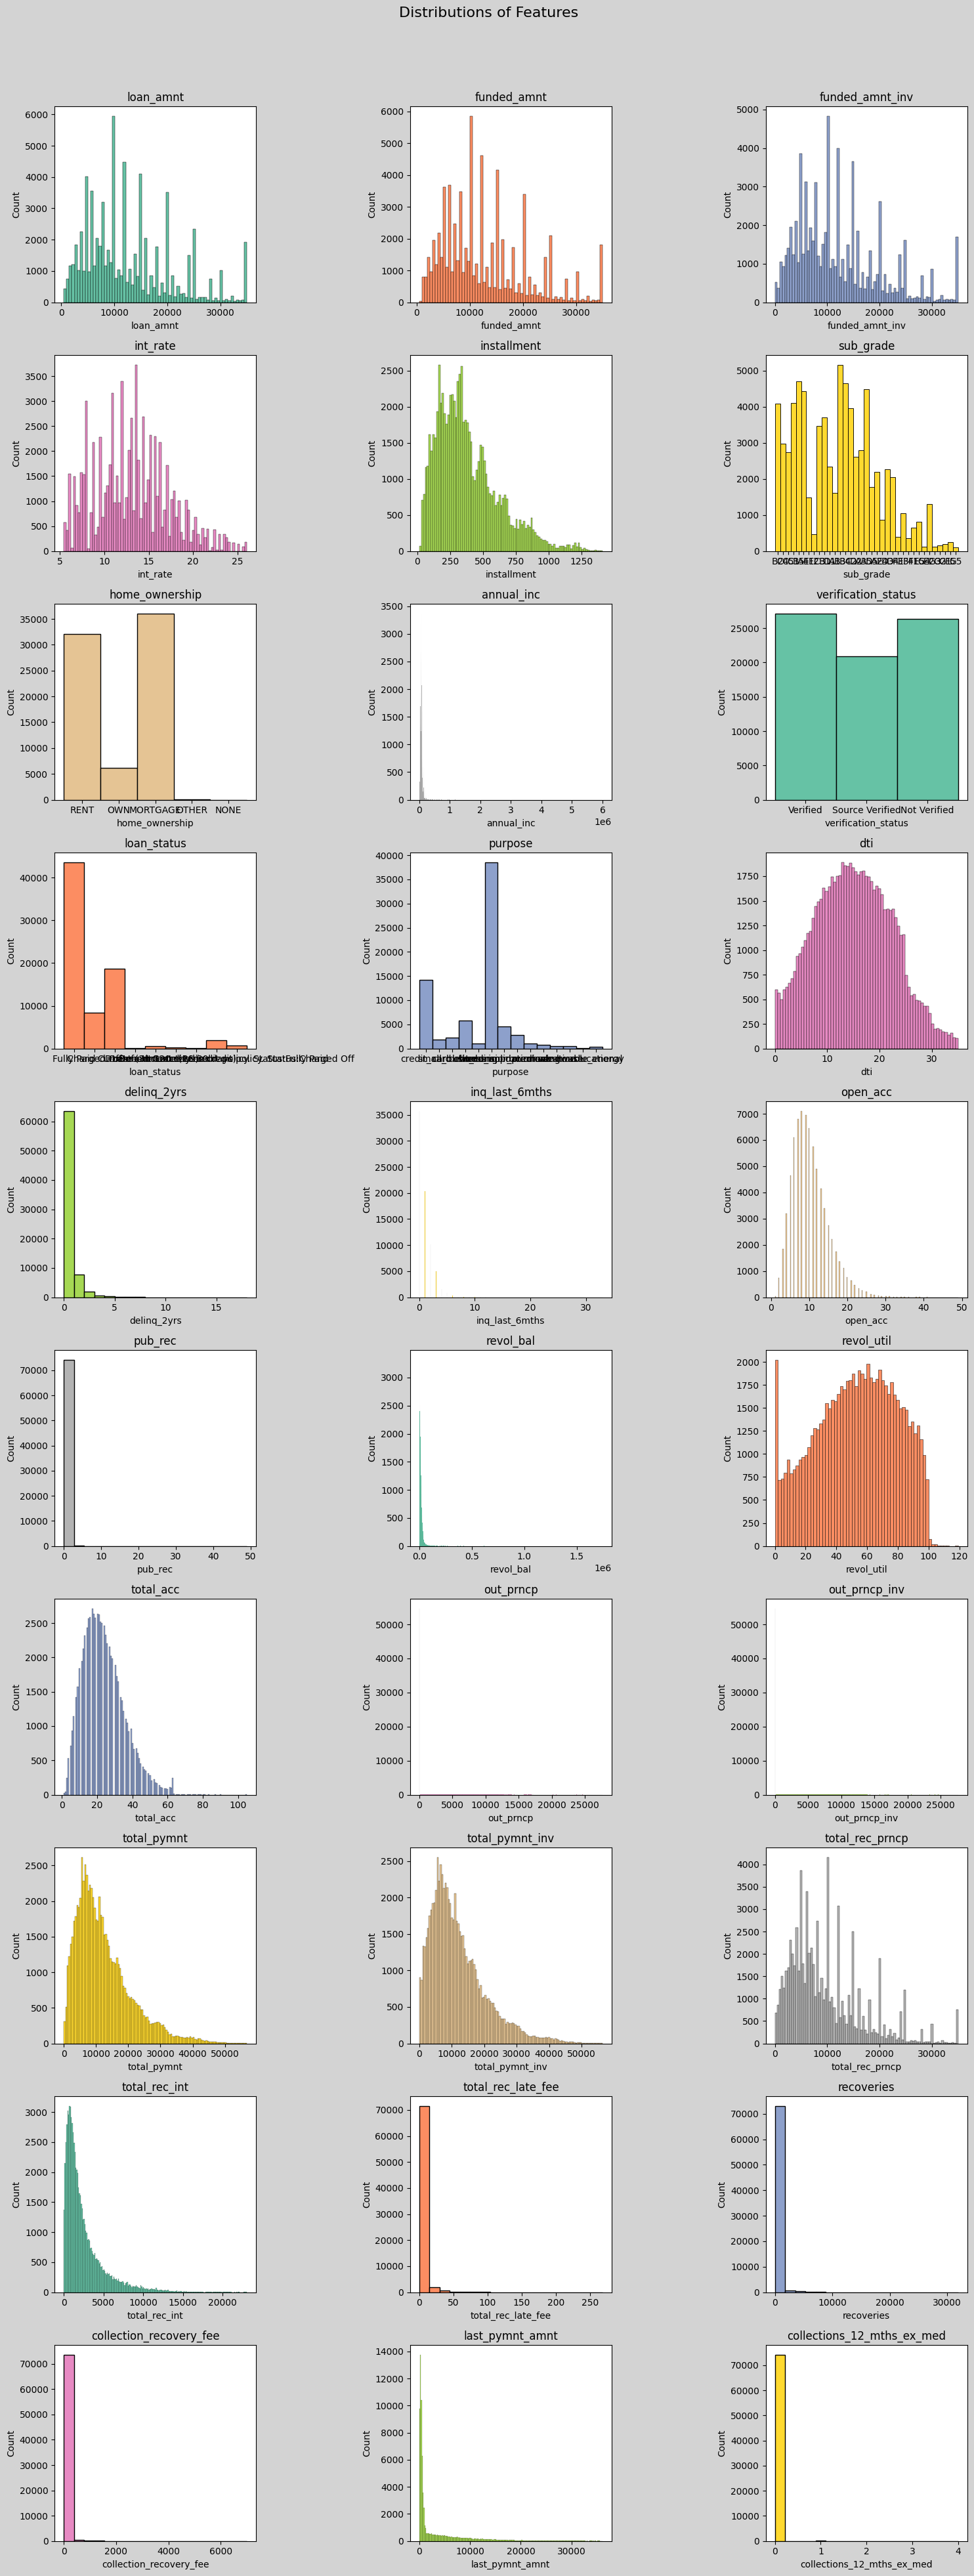

In [ ]:
features = [col for col in df.columns if df[col].nunique() > 2]



rows = (len(features) + 2) // 3

cols = 3



# Set up the figure and axis for subplots

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

axes = axes.flatten()  # Flatten in case of multiple rows



fig.patch.set_facecolor('lightgray')  # Set the background color of the entire figure



palette = sns.color_palette('Set2', len(features))



plotted_df = df.copy()

plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']

for i, col in enumerate(features):

    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1)  # Set alpha slightly transparent for better visualization

    axes[i].set_title(col)



# Remove any empty subplots (in case the number of features doesn't fill the grid)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])



fig.suptitle("Distributions of Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title



plt.show()

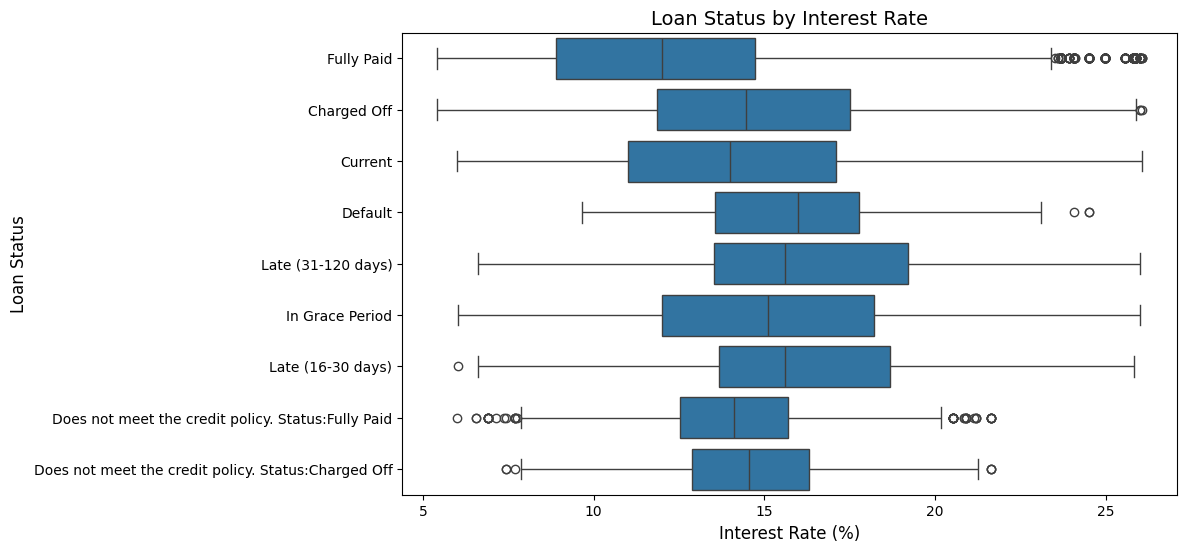

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='int_rate', y='loan_status', data=df)



plt.title('Loan Status by Interest Rate', fontsize=14)

plt.xlabel('Interest Rate (%)', fontsize=12)

plt.ylabel('Loan Status', fontsize=12)



plt.show()

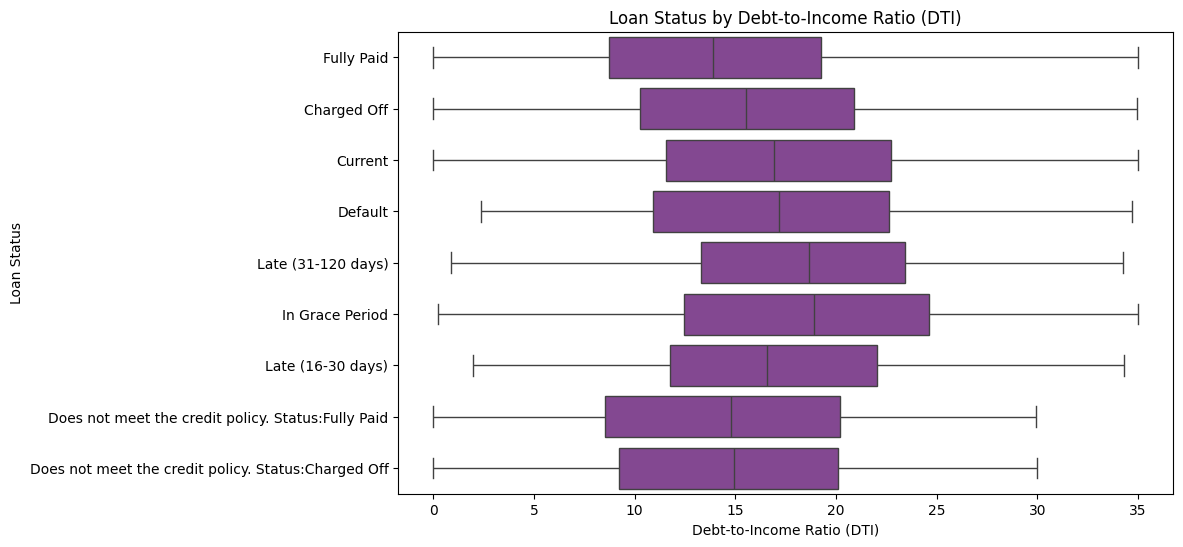

In [ ]:
plt.figure(figsize=(10, 6))



sns.boxplot(x='dti', y='loan_status', data=df, color='#8A3C9D')



plt.title('Loan Status by Debt-to-Income Ratio (DTI)')

plt.xlabel('Debt-to-Income Ratio (DTI)')

plt.ylabel('Loan Status')



plt.show()

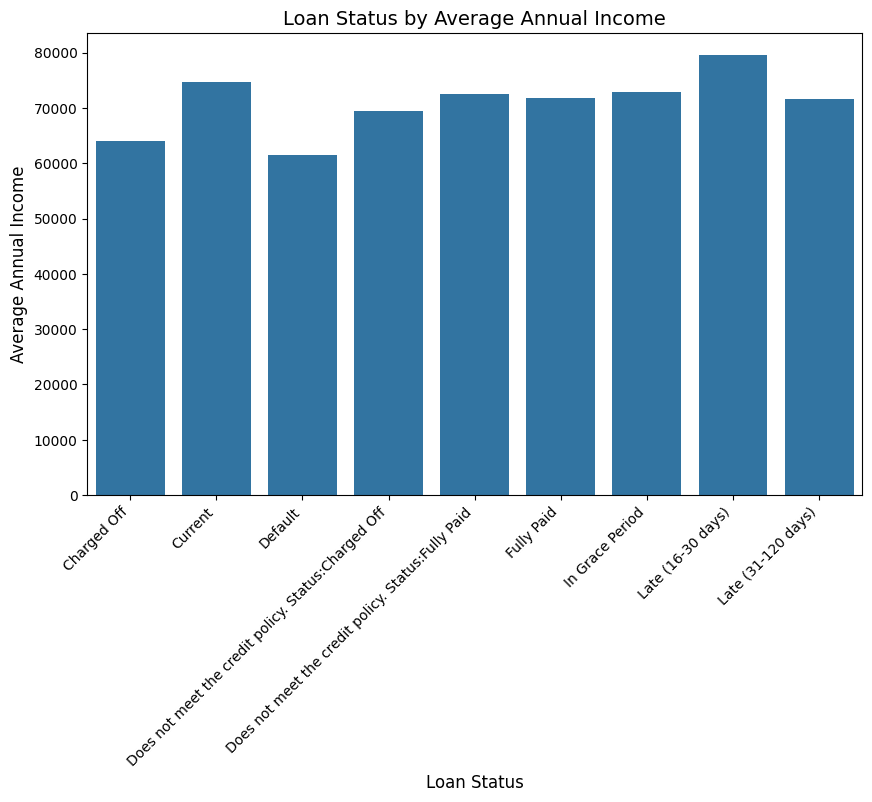

In [ ]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()



plt.figure(figsize=(10, 6))

sns.barplot(y='annual_inc',x='loan_status', data=avg_income)



plt.title('Loan Status by Average Annual Income', fontsize=14)

plt.xlabel('Loan Status', fontsize=12)

plt.ylabel('Average Annual Income', fontsize=12)

plt.xticks(rotation=45, ha='right')



plt.show()

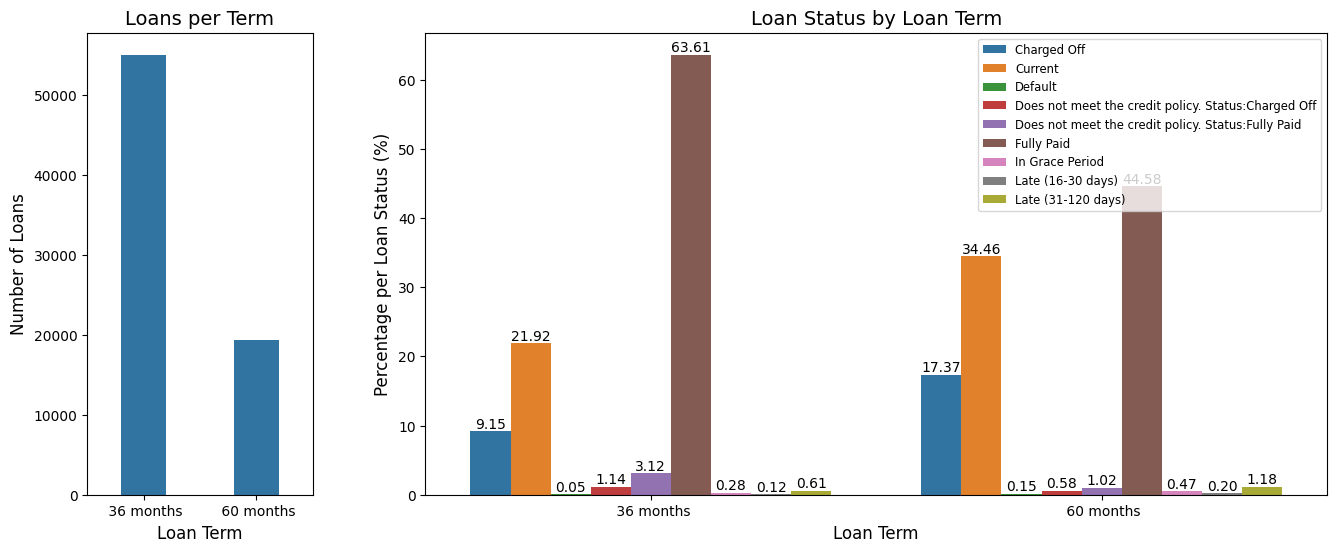

In [ ]:
loans_per_term = df['term'].value_counts().reset_index()



count_data = df.groupby(['term', 'loan_status']).size().reset_index(name='count')

count_data['percentage'] = count_data['count'] / count_data.groupby('term')['count'].transform('sum') * 100



fig = plt.figure(figsize=(16, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])



ax1 = plt.subplot(gs[0])

sns.barplot(x='term', y='count', data=loans_per_term, ax=ax1, width=0.4)

ax1.set_title('Loans per Term', fontsize=14)

ax1.set_xlabel('Loan Term', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)



ax2 = plt.subplot(gs[1])

sns.barplot(x='term', y='percentage', hue='loan_status', data=count_data, ax=ax2, width=0.8)

for p in ax2.patches:

    height = p.get_height()

    if height > 0:

        ax2.text(

            p.get_x() + p.get_width() / 2.,

            height,

            f'{height:.2f}',

            ha='center',

            va='bottom'

        )

ax2.set_title('Loan Status by Loan Term', fontsize=14)

ax2.set_xlabel('Loan Term', fontsize=12)

ax2.set_ylabel('Percentage per Loan Status (%)', fontsize=12)



ax2.legend( fontsize='small')



plt.show()

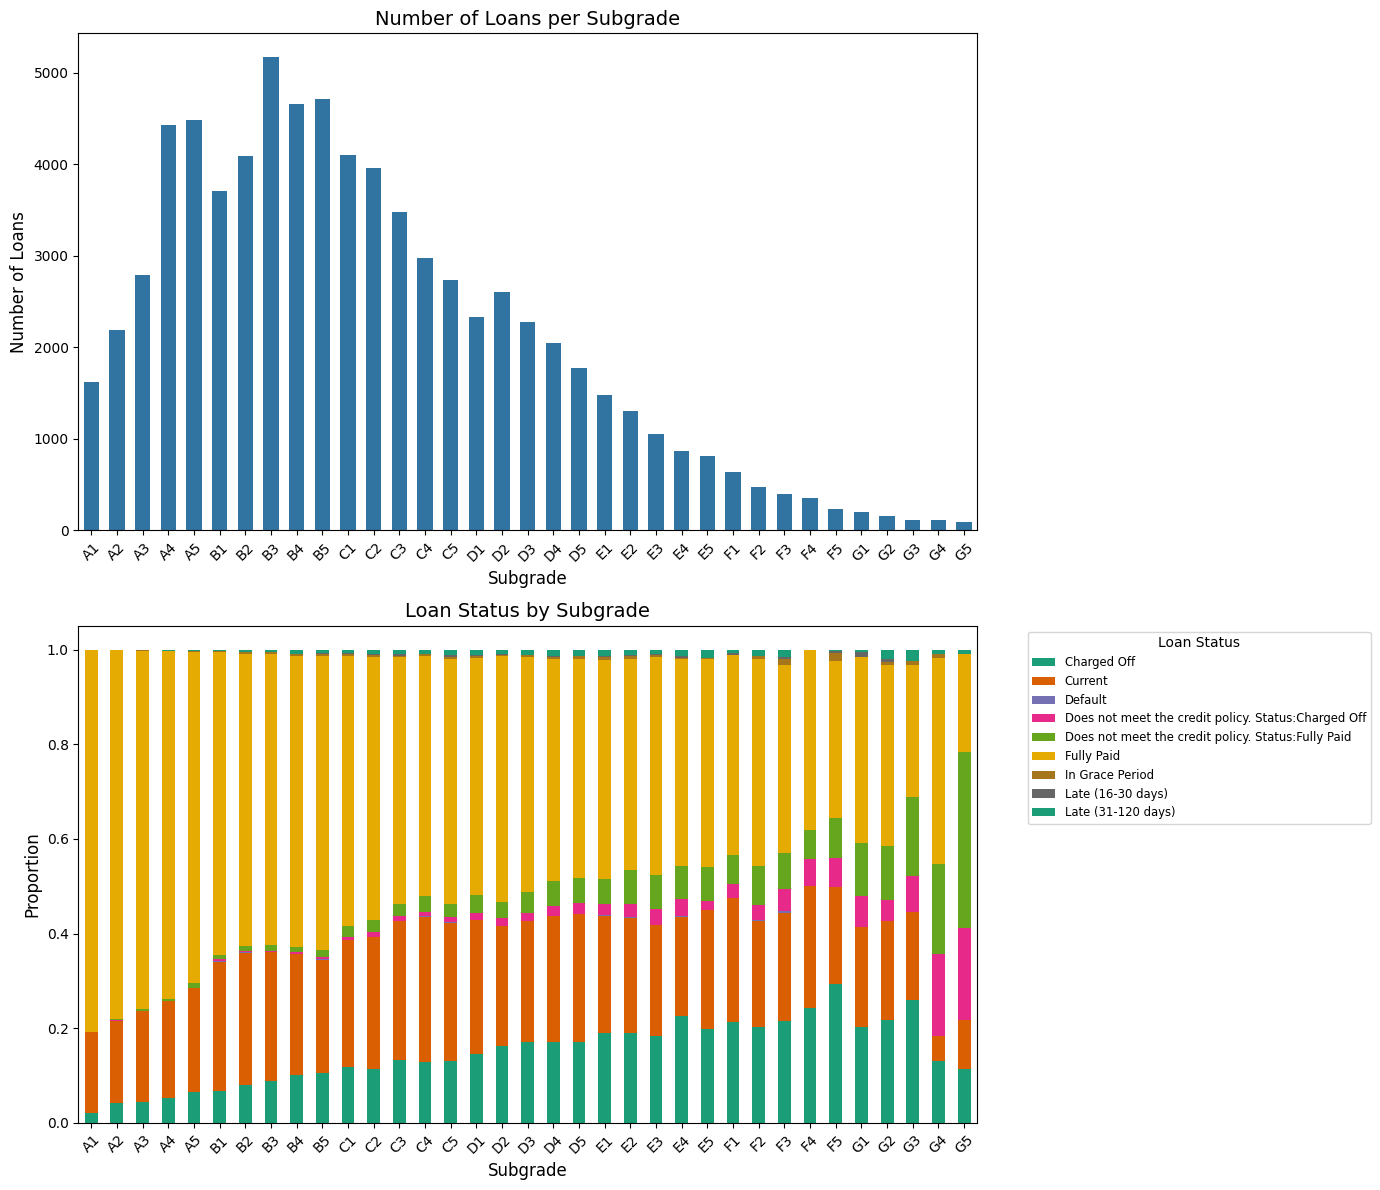

In [ ]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()



subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)



fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1, ax2 = axes[0], axes[1]



sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6)

ax1.set_title('Number of Loans per Subgrade', fontsize=14)

ax1.set_xlabel('Subgrade', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)

ax1.tick_params(axis='x', rotation=45)



subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))

ax2.set_title('Loan Status by Subgrade', fontsize=14)

ax2.set_xlabel('Subgrade', fontsize=12)

ax2.set_ylabel('Proportion', fontsize=12)

ax2.tick_params(axis='x', rotation=45)

ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')



plt.tight_layout()

plt.show()

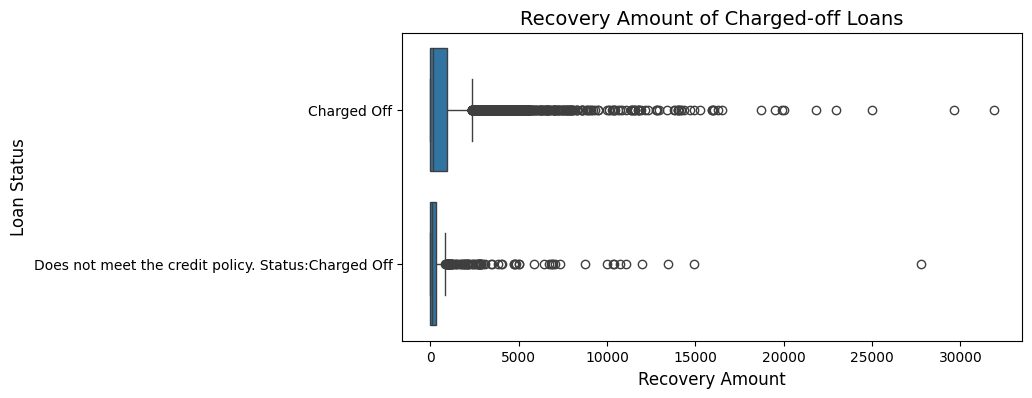

In [ ]:
charges_off_df = df[df['loan_status'].str.contains('Charged Off')]



plt.figure(figsize=(8, 4))

sns.boxplot(x='recoveries', y='loan_status', data=charges_off_df)



plt.title('Recovery Amount of Charged-off Loans', fontsize=14)

plt.ylabel('Loan Status', fontsize=12)

plt.xlabel('Recovery Amount', fontsize=12)



plt.show()

<Figure size 800x1000 with 0 Axes>

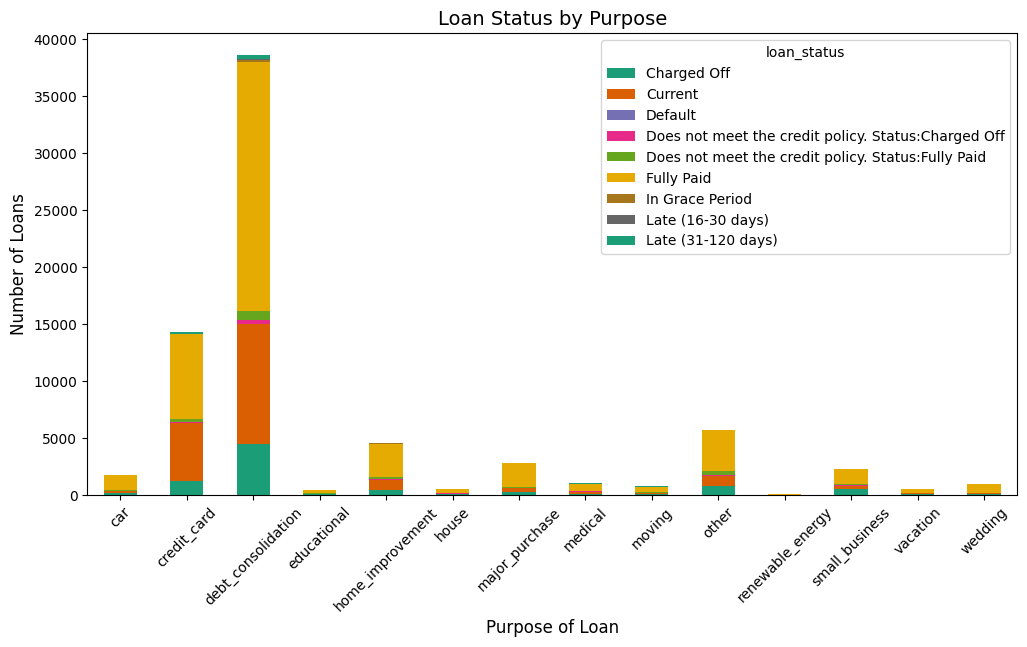

In [ ]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 10))

purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))



plt.title('Loan Status by Purpose', fontsize=14)

plt.xlabel('Purpose of Loan', fontsize=12)

plt.ylabel('Number of Loans', fontsize=12)

plt.xticks(rotation=45)



plt.show()


## Encoding

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.head()

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status
0,36 months,B2,RENT,Verified,credit_card,f
1,60 months,C4,RENT,Source Verified,car,f
2,36 months,C5,RENT,Not Verified,small_business,f
3,36 months,C1,RENT,Source Verified,other,f
4,60 months,B5,RENT,Source Verified,other,f


In [ ]:
for i in categorical_features.columns:

  print({i: categorical_features[i].value_counts()})

{'term': term
36 months    55043
60 months    19392
Name: count, dtype: int64}
{'sub_grade': sub_grade
B3    5171
B5    4711
B4    4659
A5    4480
A4    4427
C1    4100
B2    4090
C2    3962
B1    3706
C3    3474
C4    2972
A3    2794
C5    2733
D2    2609
D1    2333
D3    2274
A2    2189
D4    2043
D5    1777
A1    1619
E1    1484
E2    1307
E3    1055
E4     869
E5     811
F1     643
F2     472
F3     395
F4     351
F5     239
G1     198
G2     157
G3     119
G4     115
G5      97
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    36080
RENT        32039
OWN          6180
OTHER         134
NONE            2
Name: count, dtype: int64}
{'verification_status': verification_status
Verified           27163
Not Verified       26382
Source Verified    20890
Name: count, dtype: int64}
{'purpose': purpose
debt_consolidation    38594
credit_card           14270
other                  5744
home_improvement       4570
major_purchase         2788
small_business         2312


In [ ]:
def sub_grades_encoding(x):

  val = 0

  if 'A' in x:

    val = 7

  elif 'B' in x:

    val = 6

  elif 'C' in x:

    val = 5

  elif 'D' in x:

    val = 4

  elif 'E' in x:

    val = 3

  elif 'F' in x:

    val = 2

  elif 'G' in x:

    val = 1



  if '1' in x:

    val += 0.8

  elif '2' in x:

    val += 0.6

  elif '3' in x:

    val += 0.4

  elif '4' in x:

    val += 0.2

  elif '5' in x:

    val += 0.0



  return val



def verification_status(x):

  if x == 'Not Verified':

    return 0

  return 1

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)

In [ ]:
df['sub_grade'].unique()

array([6.6, 5.2, 5. , 5.8, 6. , 7.2, 3.8, 2.6, 5.4, 6.8, 4.8, 7.8, 6.4,
       6.2, 5.6, 4.6, 7.4, 7. , 4. , 7.6, 3.2, 4.4, 4.2, 2.4, 3.4, 2.2,
       2.8, 3. , 1.2, 3.6, 1.4, 1.6, 1.8, 2. , 1. ])

In [ ]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()



df['term'] = label_encoder.fit_transform(df['term'])

df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [ ]:
df['verification_status'] = df['verification_status'].apply(verification_status)

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.isna().sum()

,0
home_ownership,0
purpose,0


In [ ]:
encoded_features = pd.get_dummies(categorical_features, dtype=int)

encoded_features.head(3)

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.drop(columns=categorical_features.columns, inplace=True)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,0,10.65,162.87,6.6,24000.0,1,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,5.2,30000.0,1,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,5.0,12252.0,0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

## Handling Missing Values

In [ ]:
df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
sub_grade,0
annual_inc,0
verification_status,0
loan_status,0


In [ ]:
# # Importing necessary libraries

# from sklearn.experimental import enable_iterative_imputer  # To enable IterativeImputer

# from sklearn.impute import IterativeImputer



# # Initialize the IterativeImputer with optimized settings

# imputer = IterativeImputer(max_iter=5, random_state=0)



# # Fit and transform the data

# imputed_data = imputer.fit_transform(df)



# # Convert back to a DataFrame if needed

# imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

'the IterativeImputer_credit.csv holds the imputed data'

In [ ]:
# imputed_df = pd.read_csv('IterativeImputer_credit.csv')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# print(df.isnull().sum())

iterative_imputer = IterativeImputer(random_state=42)

imputed_df = iterative_imputer.fit_transform(df)

# Convert the numpy array back to DataFrame
imputed_df = pd.DataFrame(df_imputed, columns=df.columns)


In [ ]:
imputed_df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
sub_grade,0
annual_inc,0
verification_status,0
loan_status,0


In [ ]:
imputed_df.shape

(74435, 49)

In [ ]:
imputed_df['inq_last_6mths'].value_counts()

# Split Data & Scaling

In [ ]:
from sklearn.model_selection import train_test_split



x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [ ]:
x_rest, X, y_rest, Y = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y, shuffle=True)

In [ ]:
X.shape, Y.shape

((7444, 48), (7444,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

# Feature Reduction

In [ ]:
from sklearn.decomposition import PCA



pca = PCA(n_components=len(x_train.columns))



pca.fit(x_train)

PCA(n_components=48)

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

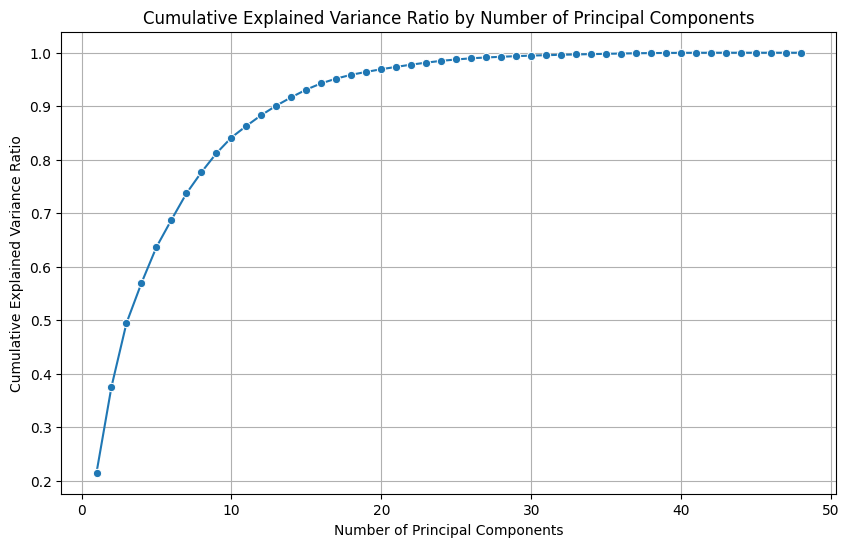

In [ ]:
# Create a DataFrame for cumulative explained variance ratio
cvr = pd.DataFrame({
    'Number of Principal Components': range(1, len(cumulative_variance_ratio) + 1),
    'Cumulative Explained Variance Ratio': cumulative_variance_ratio
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the line plot using Seaborn
sns.lineplot(data=cvr,
             x='Number of Principal Components',
             y='Cumulative Explained Variance Ratio',
             marker='o')  # Adding markers for clarity

# Add title and labels
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Add grid lines for better readability
plt.grid(True)

# Show the figure
plt.show()

In [ ]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

# Modeling

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



rf_classifier = RandomForestClassifier(n_estimators=500,  max_depth=7, random_state=42)

rf_classifier.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [ ]:
y_pred_train = rf_classifier.predict(x_train_pca)

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

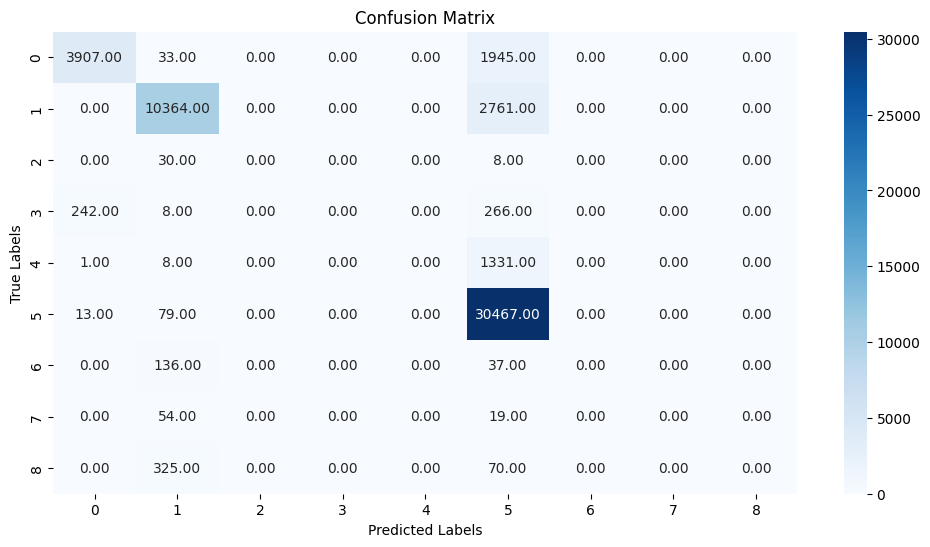

In [ ]:
# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78      5885
         1.0       0.94      0.79      0.86     13125
         2.0       0.00      0.00      0.00        38
         3.0       0.00      0.00      0.00       516
         4.0       0.00      0.00      0.00      1340
         5.0       0.83      1.00      0.90     30559
         6.0       0.00      0.00      0.00       173
         7.0       0.00      0.00      0.00        73
         8.0       0.00      0.00      0.00       395

    accuracy                           0.86     52104
   macro avg       0.30      0.27      0.28     52104
weighted avg       0.83      0.86      0.83     52104



In [ ]:
f1_score(y_train, y_pred_train, average='weighted')

0.833673524171781

In [ ]:
y_pred_test = rf_classifier.predict(x_test_pca)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

In [ ]:
# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.77      2522
         1.0       0.93      0.77      0.84      5625
         2.0       0.00      0.00      0.00        17
         3.0       0.00      0.00      0.00       222
         4.0       0.00      0.00      0.00       574
         5.0       0.82      1.00      0.90     13097
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        31
         8.0       0.00      0.00      0.00       169

    accuracy                           0.85     22331
   macro avg       0.30      0.27      0.28     22331
weighted avg       0.82      0.85      0.83     22331



In [ ]:
f1_score(y_test, y_pred_test, average='weighted')

0.8255253802559351

## XGBoost

In [ ]:
from xgboost import XGBClassifier



model = XGBClassifier(

    n_estimators=500,        # Number of boosting rounds

    learning_rate=0.1,       # Step size shrinkage to prevent overfitting

    max_depth=3,             # Maximum depth of a tree

    subsample=0.8,           # Subsample ratio of the training data

    colsample_bytree=0.8,    # Subsample ratio of features for each tree

    gamma=0,                 # Minimum loss reduction required to make a further partition

    reg_lambda=1,            # L2 regularization term

    objective='multi:softmax' # For multiclass classification (use 'binary:logistic' for binary)

)

In [ ]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

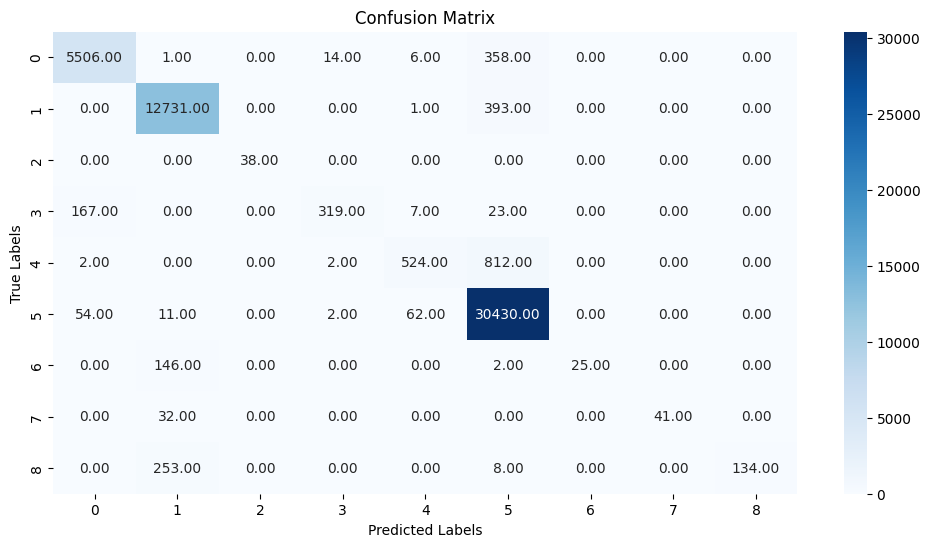

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      5885
         1.0       0.97      0.97      0.97     13125
         2.0       1.00      1.00      1.00        38
         3.0       0.95      0.62      0.75       516
         4.0       0.87      0.39      0.54      1340
         5.0       0.95      1.00      0.97     30559
         6.0       1.00      0.14      0.25       173
         7.0       1.00      0.56      0.72        73
         8.0       1.00      0.34      0.51       395

    accuracy                           0.95     52104
   macro avg       0.97      0.66      0.74     52104
weighted avg       0.95      0.95      0.95     52104



0.949026572468609

In [ ]:
y_pred_train_xgb = model.predict(x_train_pca)

cm = confusion_matrix(y_train, y_pred_train_xgb)

# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_train, y_pred_train_xgb))

f1_score(y_train, y_pred_train_xgb, average='weighted')

In [ ]:
y_pred_test_xgb = model.predict(x_test_pca)

cm = confusion_matrix(y_test, y_pred_test_xgb)

# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_test, y_pred_test_xgb))

f1_score(y_test, y_pred_test_xgb, average='weighted')

In [ ]:
label_encoder.classes_

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      dtype=object)

## XGBoost on all data

In [ ]:
x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [ ]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

In [ ]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

In [ ]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

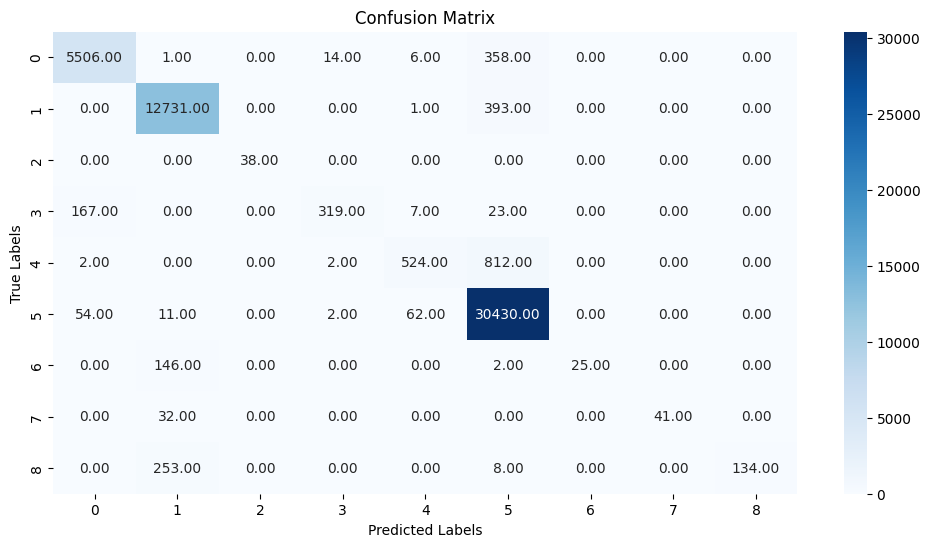

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      5885
         1.0       0.97      0.97      0.97     13125
         2.0       1.00      1.00      1.00        38
         3.0       0.95      0.62      0.75       516
         4.0       0.87      0.39      0.54      1340
         5.0       0.95      1.00      0.97     30559
         6.0       1.00      0.14      0.25       173
         7.0       1.00      0.56      0.72        73
         8.0       1.00      0.34      0.51       395

    accuracy                           0.95     52104
   macro avg       0.97      0.66      0.74     52104
weighted avg       0.95      0.95      0.95     52104

Accuracy Train: 0.9547827422078919
F1 Score Trian: 0.949026572468609


In [ ]:
y_pred_train_xgb = model.predict(x_train_pca)
cm = confusion_matrix(y_train, y_pred_train_xgb)
# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_train, y_pred_train_xgb))

Accuracy_Train = accuracy_score(y_train, y_pred_train_xgb)
F1_Score_Train = f1_score(y_train, y_pred_train_xgb, average='weighted')

print(f"Accuracy Train: {Accuracy_Train}")
print(f"F1 Score Trian: {F1_Score_Train}")

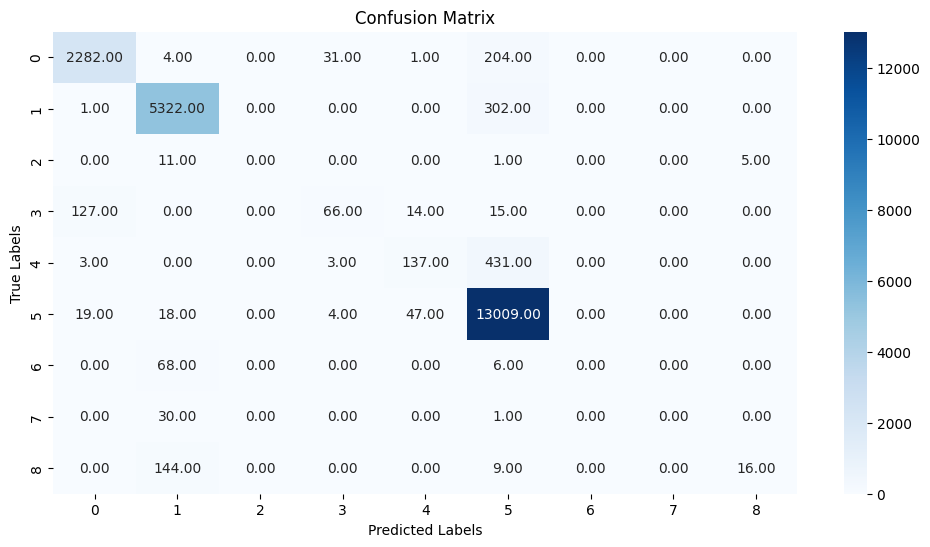

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2522
         1.0       0.95      0.95      0.95      5625
         2.0       0.00      0.00      0.00        17
         3.0       0.63      0.30      0.40       222
         4.0       0.69      0.24      0.35       574
         5.0       0.93      0.99      0.96     13097
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        31
         8.0       0.76      0.09      0.17       169

    accuracy                           0.93     22331
   macro avg       0.54      0.39      0.42     22331
weighted avg       0.92      0.93      0.92     22331

Accuracy Test: 0.9328735838072635
F1 Score Test: 0.9209729917987475


In [ ]:
y_pred_test_xgb = model.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred_test_xgb)
# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test, y_pred_test_xgb))

Accuracy_Test = accuracy_score(y_test, y_pred_test_xgb)
F1_Score_Test = f1_score(y_test, y_pred_test_xgb, average='weighted')

print(f"Accuracy Test: {Accuracy_Test}")
print(f"F1 Score Test: {F1_Score_Test}")

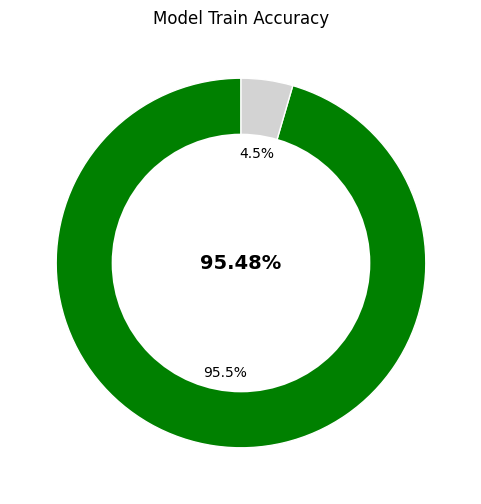

In [ ]:
# Create a pie chart with a single slice representing the accuracy
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(Accuracy_Train*100, 2), 100 - round(Accuracy_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(Accuracy_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Train Accuracy')

# Show the plot
plt.show()

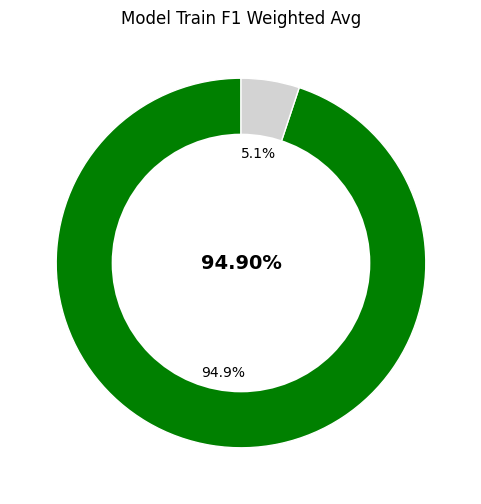

In [ ]:
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(F1_Score_Train*100, 2), 100 - round(F1_Score_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(F1_Score_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Train F1 Weighted Avg')

# Show the plot
plt.show()

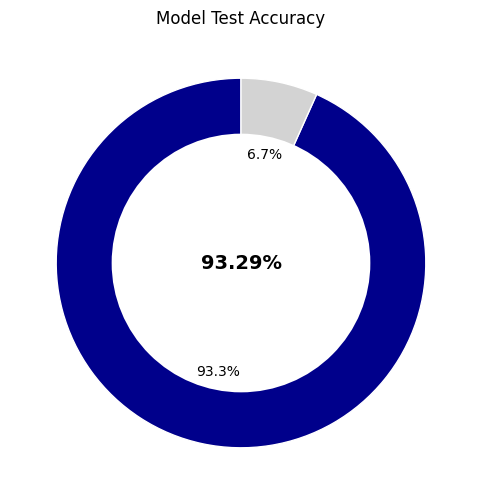

In [ ]:
# Create a pie chart with a single slice representing the accuracy
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(Accuracy_Test*100, 2), 100 - round(Accuracy_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(Accuracy_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Test Accuracy')

# Show the plot
plt.show()

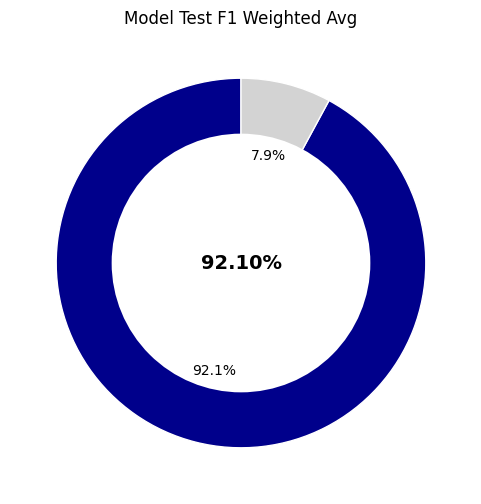

In [ ]:
plt.figure(figsize=(6, 6))  # Adjust size as needed
plt.pie([round(F1_Score_Test*100, 2), 100 - round(F1_Score_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Add a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add accuracy text in the center
plt.text(0, 0, f'{round(F1_Score_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Add a title
plt.title('Model Test F1 Weighted Avg')

# Show the plot
plt.show()